<a href="https://colab.research.google.com/github/Sukruth99/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

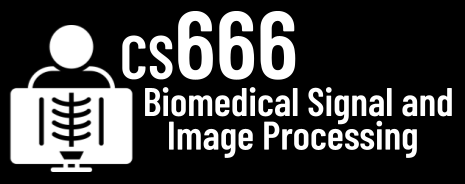
#Assignment 5

In [ ]:
# NAME:SUKRUTH KOTTURU  

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER: There are 220 slices.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

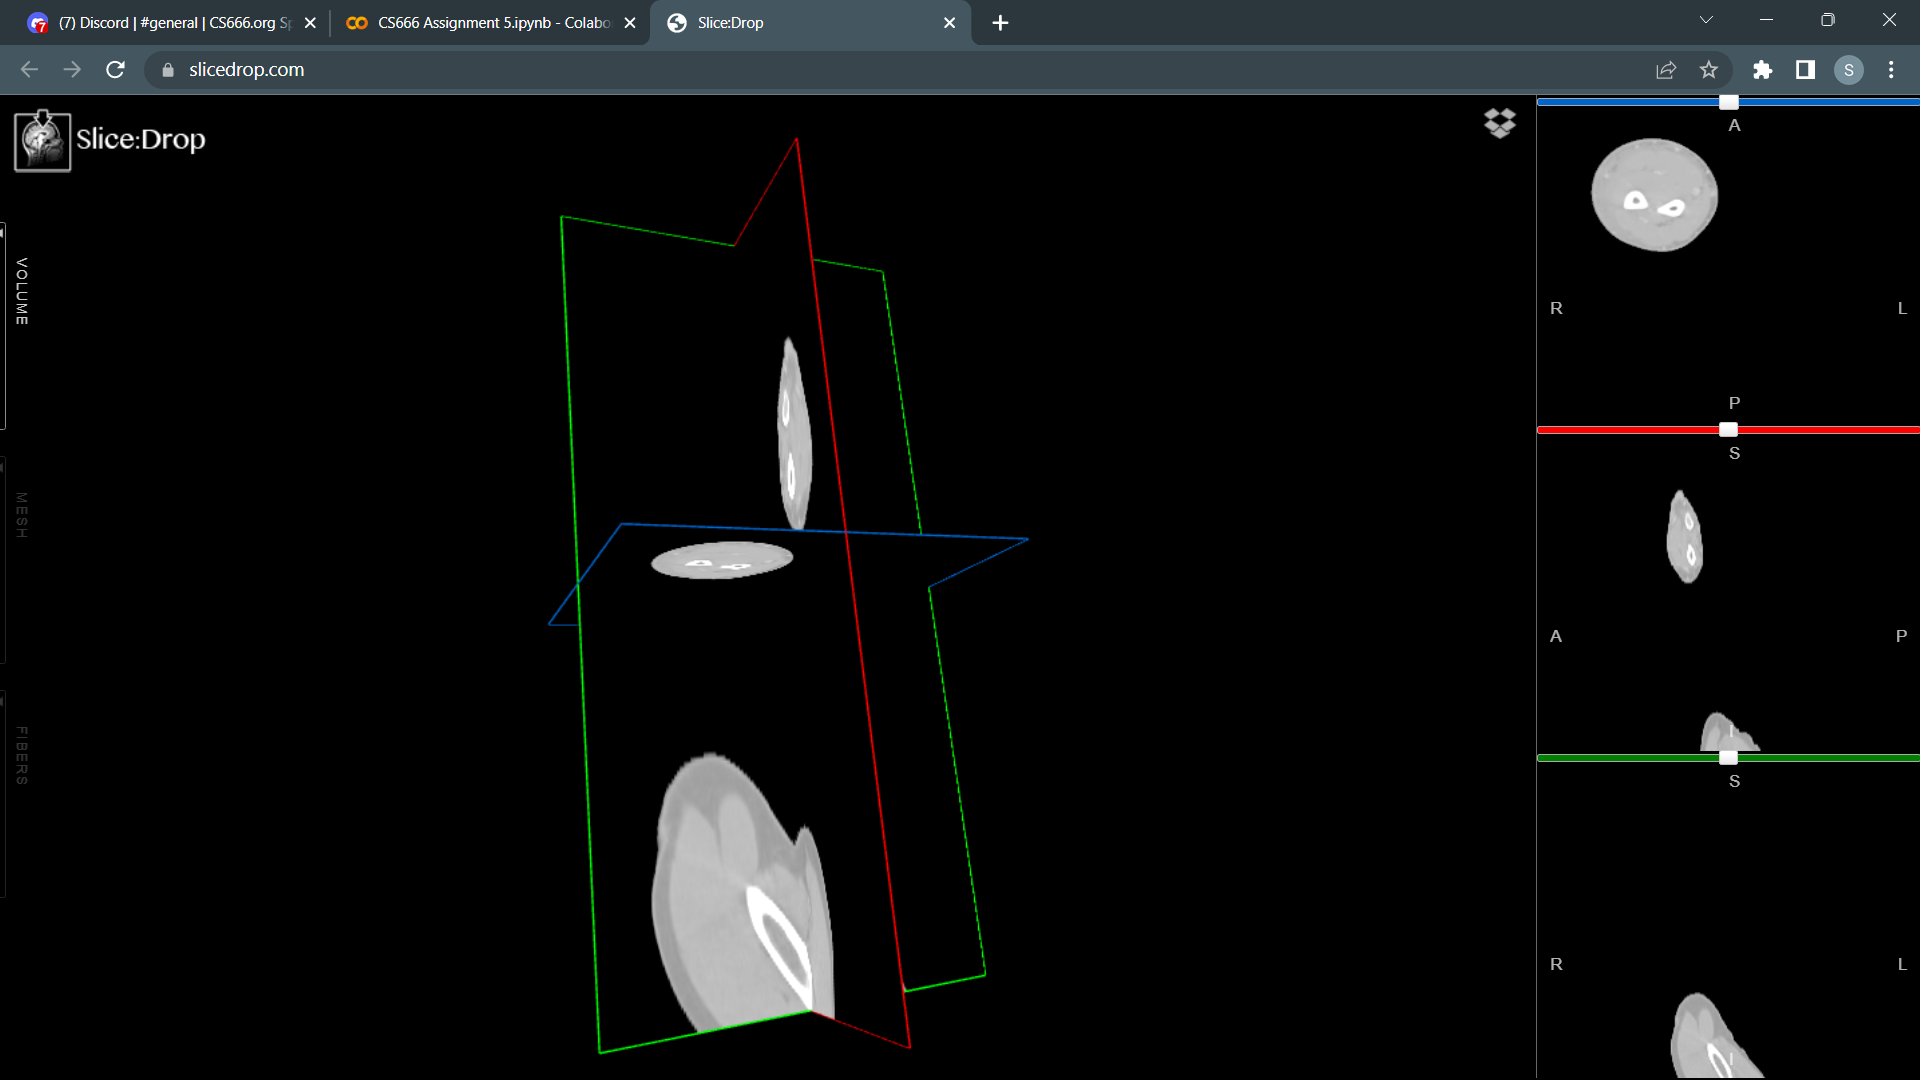

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

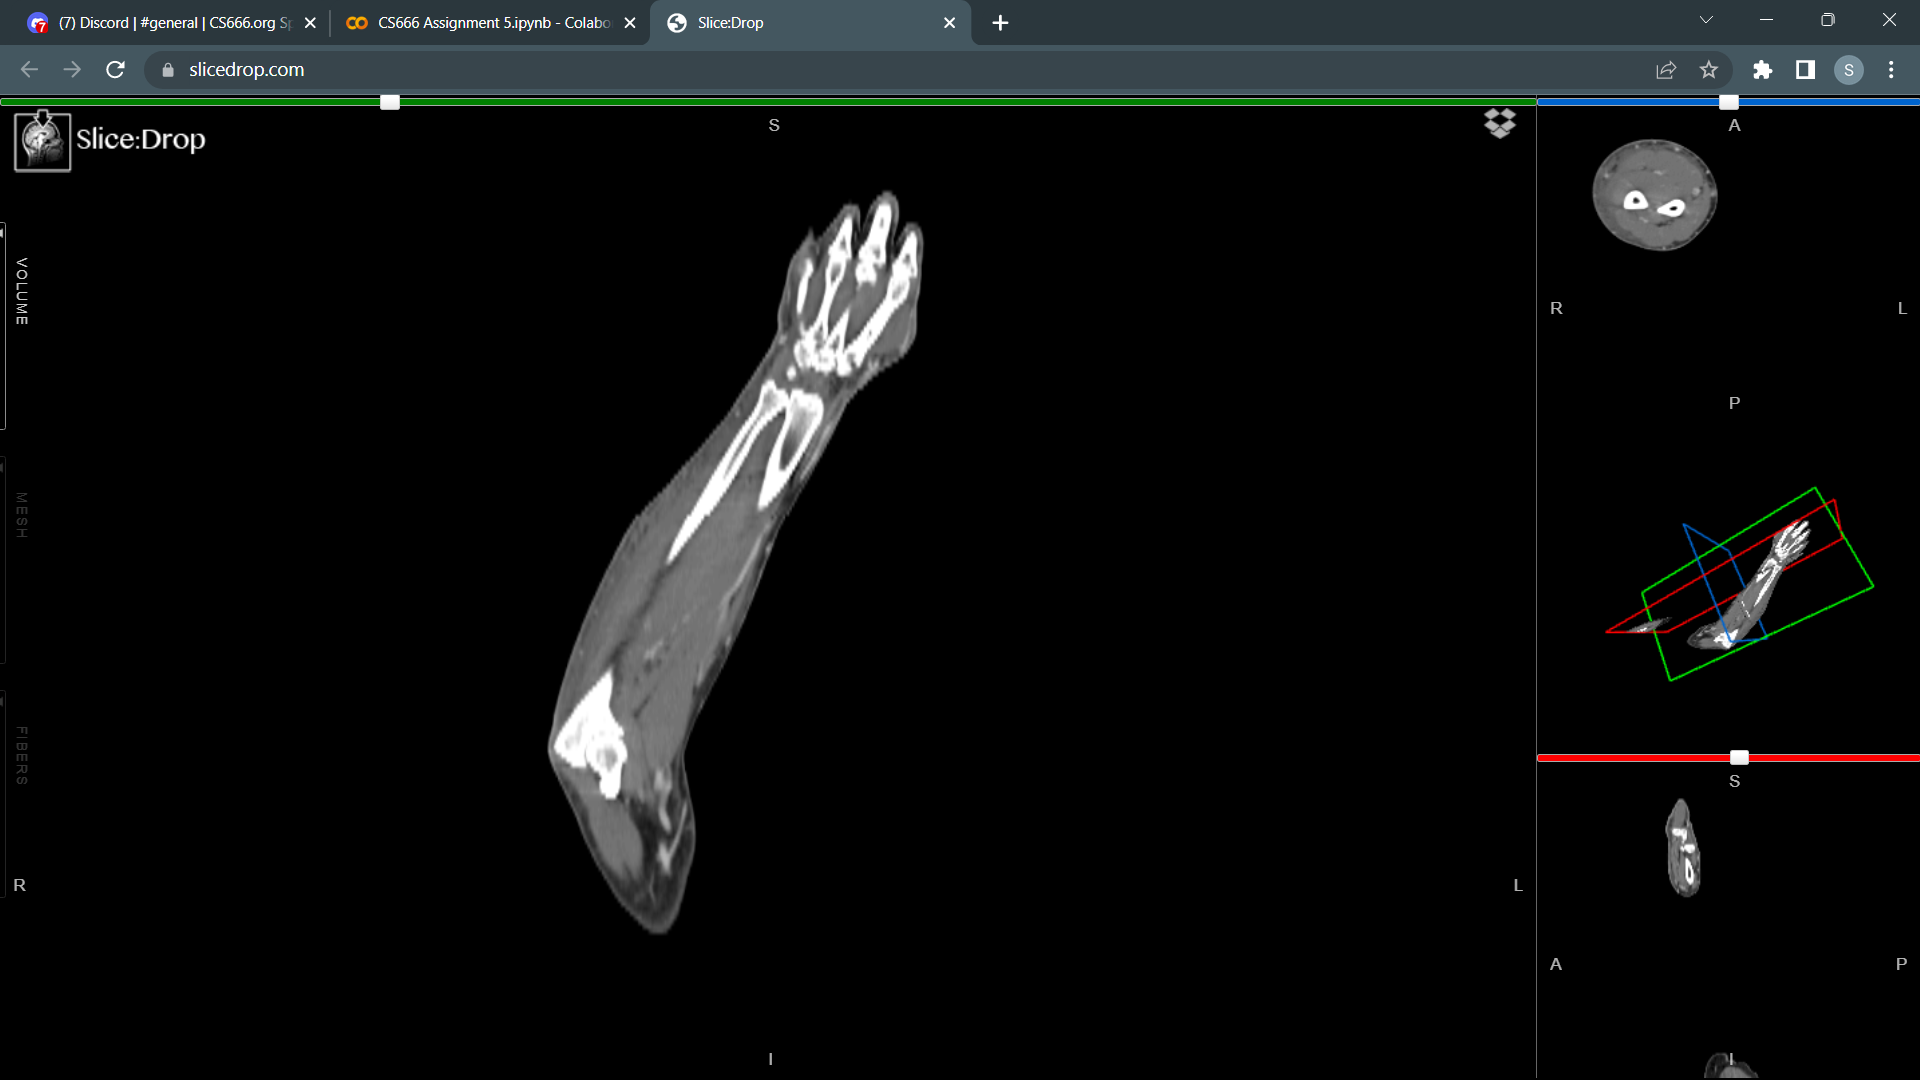

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [3]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [7]:
from pydicom import dcmread

In [10]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np
import pydicom


DIR = './ct/'


files = os.listdir(DIR)
files.sort()

img = pydicom.dcmread(os.path.join(DIR, files[0]))
height, width = img.Rows, img.Columns
depth = len(files)


data = np.zeros((depth, height, width), dtype=np.uint16)

# Loop through all the files and store them in the numpy array
for i, filename in enumerate(files):
    img = pydicom.dcmread(os.path.join(DIR, filename))
    data[i, :, :] = img.pixel_array
    

print(data.shape)

(220, 454, 512)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

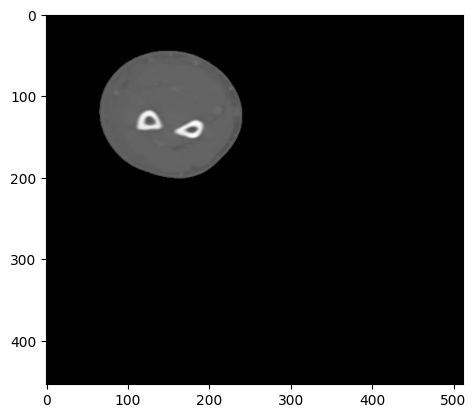

In [12]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt

# Axial slice
axial_slice = data[data.shape[0] // 2, :, :]
plt.imshow(axial_slice, cmap='gray')
plt.show()


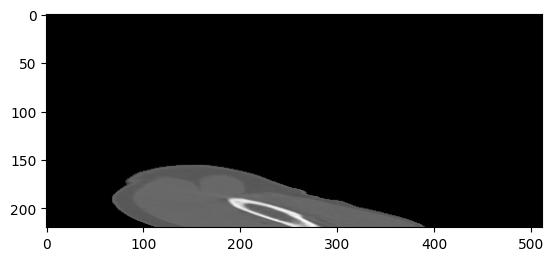

In [13]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_slice = data[:, data.shape[1] // 2, :]
plt.imshow(sagittal_slice, cmap='gray')
plt.show()

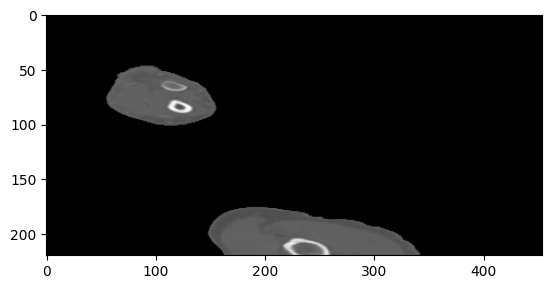

In [14]:
# TODO: YOUR CODE FOR CORONAL
coronal_slice = data[:, :, data.shape[2] // 2]
plt.imshow(coronal_slice, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window width: 410
Window level: 30
Rescale intercept: -1024


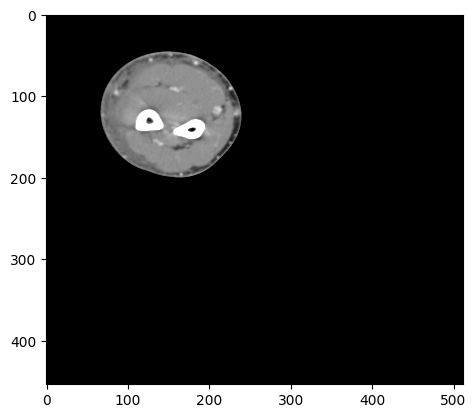

In [17]:
# TODO: YOUR CODE
win = img[0x0028, 0x1051].value
lvl = img[0x0028, 0x1050].value
res = img[0x0028, 0x1052].value

print('Window width:', win)
print('Window level:', lvl)
print('Rescale intercept:', res)

vmin = lvl - win/2
vmax = lvl + win/2
plt.imshow(data[110, :, :] + res, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
#Reference : StackOverflow and Geeksforgeeks

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

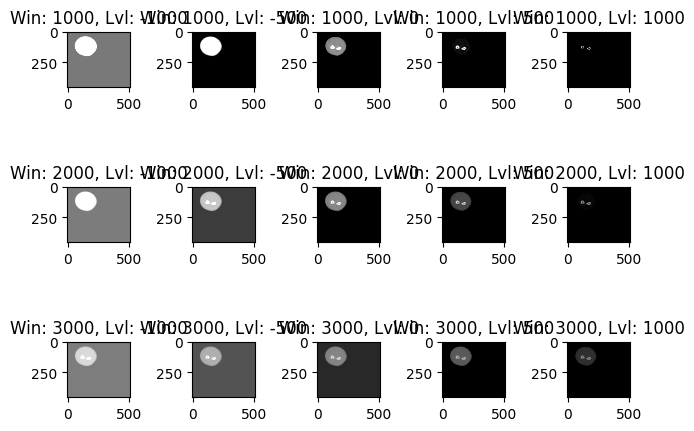

In [18]:
# TODO: YOUR CODE
ds = pydicom.dcmread(os.path.join(DIR, files[0]))
win = ds.WindowWidth
lvl = ds.WindowCenter
res = ds.RescaleIntercept

# Define some window/level values to test
test_wins = [1000, 2000, 3000]
test_lvls = [-1000, -500, 0, 500, 1000]

# Show each test image with the original and modified window/level values
for i, test_win in enumerate(test_wins):
    for j, test_lvl in enumerate(test_lvls):
        vmin = test_lvl - test_win/2
        vmax = test_lvl + test_win/2
        
        plt.subplot(len(test_wins), len(test_lvls), i*len(test_lvls) + j + 1)
        plt.imshow(data[110] + res, cmap='gray', vmin=vmin, vmax=vmax)
        plt.title(f"Win: {test_win}, Lvl: {test_lvl}")
        
plt.tight_layout()
plt.show()
# REFERENCES : os module: https://docs.python.org/3/library/os.html
#numpy module: https://numpy.org/doc/stable/
#pydicom module: https://pydicom.github.io/pydicom/stable/getting_started.html
#pyplot module of matplotlib: https://matplotlib.org/stable/api/pyplot_summary.html

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER
#The goal is to find the optimal values that enhance the visualization of the CT scan.
 #The code plots each test image with the original and modified window/level values.
  #The optimal values depend on the specific CT scan and the structures of interest.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]


In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

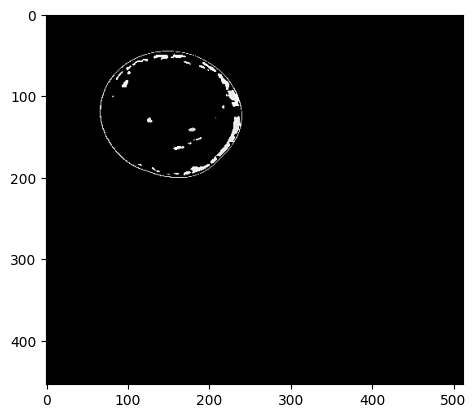

In [19]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_range = (800, 1000)

fat_mask = arr_3D.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < fat_range[0], fat_mask > fat_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_range = (1000, 1100)

soft_tissue_mask = arr_3D.copy()
soft_tissue_mask = soft_tissue_mask.astype(np.int16)
soft_tissue_mask[np.logical_or(soft_tissue_mask < soft_tissue_range[0], soft_tissue_mask > soft_tissue_range[1])] = 0

plt.imshow(soft_tissue_mask[110, :, :], cmap='gray')
plt.show()

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_range = (2000, 2900)

bone_mask = arr_3D.copy()
bone_mask = bone_mask.astype(np.int16)
bone_mask[np.logical_or(bone_mask < bone_range[0], bone_mask > bone_range[1])] = 0

plt.imshow(bone_mask[110, :, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER : YES

In [ ]:
# " BONUS TASK  COLAB WITH RONAK BURMAN"

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""